In [67]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import model
import utils
from model import Net


In [68]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


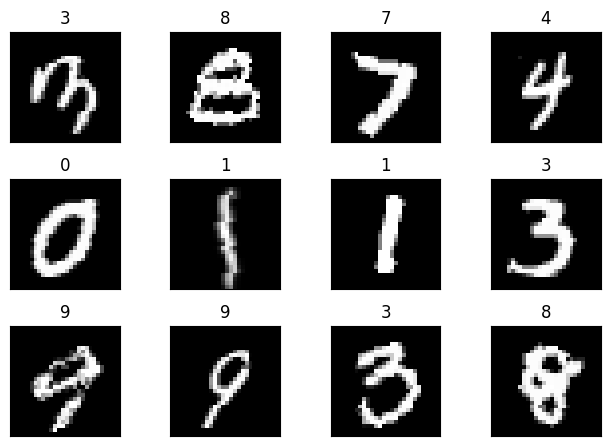

In [69]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()#it is Matlab function for creating a new blank canvas for creating input and getting output on the x and y axis

for i in range(12):
  plt.subplot(3,4,i+1)#this allows you to creat subplots withing large or main figurs
  plt.tight_layout()# it is used for adjusting the subplot parameters to make suare that all plot elements fit nicely
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')# This code takes the image from batch data and squeeze removes the first dimensions which are batch data, and coverts the batch data into the single image and Cmap specifies the colormap, that will use in displaying the image
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [70]:
!pip install torchsummary #installing the torchsummary
from torchsummary import summary #imporing the summary function from torchsummary
use_cuda = torch.cuda.is_available()#checking the cuda is available
device = torch.device("cuda" if use_cuda else "cpu") #if cuda is not avail then use the cpu
model = Net().to(device)
summary(model, input_size=(1, 28, 28))#creat the summary of the model

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=2.2985 Batch_id=7 Accuracy=9.86:   7%|▋         | 8/118 [00:28<06:26,  3.51s/it]